# **8:CLUSTERING ANALYSIS -Understanding and Implementing K-Means, Hierarchical, and DBSCAN Algorithms**

# *Objective:*
The objective of this assignment is to introduce to various clustering algorithms, including K-Means, hierarchical, and DBSCAN, and provide hands-on experience in applying these techniques to a real-world dataset.

# **1)Data Preprocessing:**

# Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,DBSCAN
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
df.shape

(3999, 12)

In [5]:
df.size

47988

In [6]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [8]:
#Missing values
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [9]:
#Duplicates
df.duplicated().sum()

np.int64(0)

In [10]:
df.drop(columns='ID#',inplace=True)
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


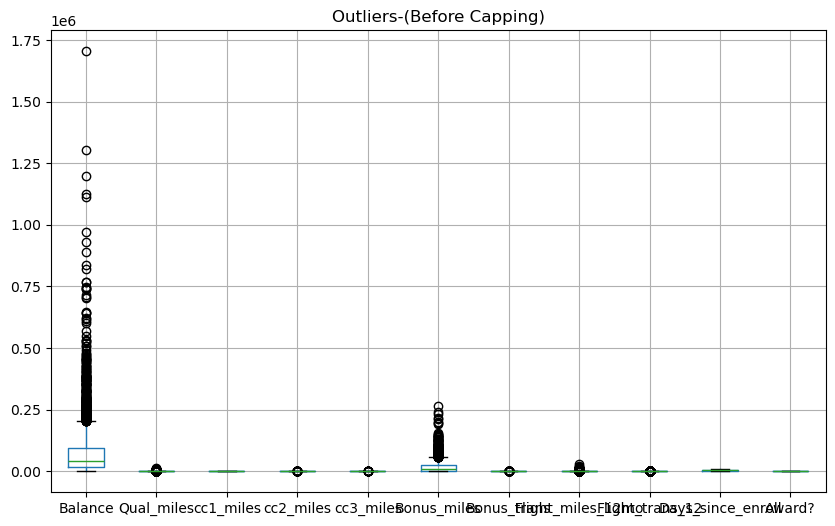

In [11]:
# Outlier detection
plt.figure(figsize=(10,6))
df.boxplot()
plt.title('Outliers-(Before Capping)')
plt.show()

In [12]:
#Outlier Capping
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    Lower_extreme=Q1-1.5*IQR
    Upper_Extreme=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x: Lower_extreme if x<Lower_extreme else Upper_Extreme if x>Upper_Extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

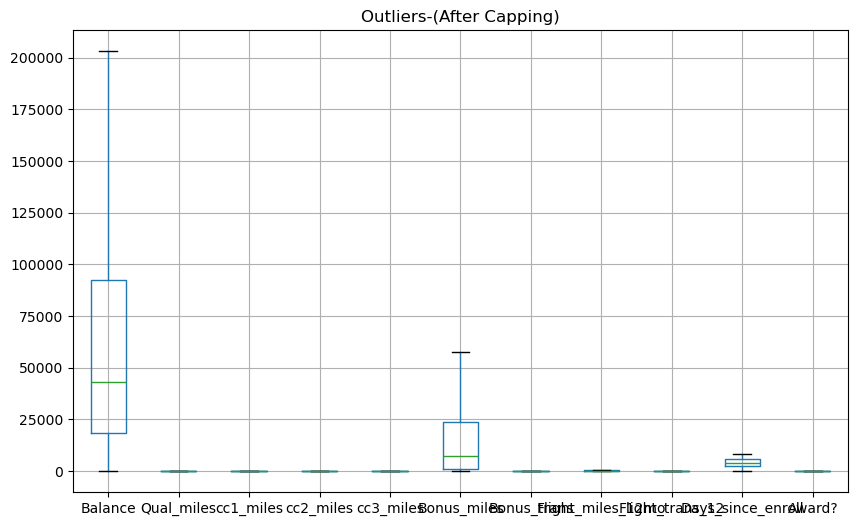

In [13]:
plt.figure(figsize=(10,6))
df.boxplot()
plt.title('Outliers-(After Capping)')
plt.show()

# Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.

# Use multiple visualizations to understand the hidden patterns in the dataset

In [14]:
df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3999.0,3999.000000,3999.0,3999.0,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000
mean,63768.635784,0.0,2.059515,1.0,1.0,15410.730683,11.470618,178.055639,0.591523,4118.55939,0.370343
std,58673.700736,0.0,1.376919,0.0,0.0,18074.733482,9.115104,294.678028,0.944826,2065.13454,0.482957
min,0.000000,0.0,1.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,2.00000,0.000000
25%,18527.500000,0.0,1.000000,1.0,1.0,1250.000000,3.000000,0.000000,0.000000,2330.00000,0.000000
50%,43097.000000,0.0,1.000000,1.0,1.0,7171.000000,12.000000,0.000000,0.000000,4096.00000,0.000000
75%,92404.000000,0.0,3.000000,1.0,1.0,23800.500000,17.000000,311.000000,1.000000,5790.50000,1.000000
max,203218.750000,0.0,5.000000,1.0,1.0,57626.250000,38.000000,777.500000,2.500000,8296.00000,1.000000


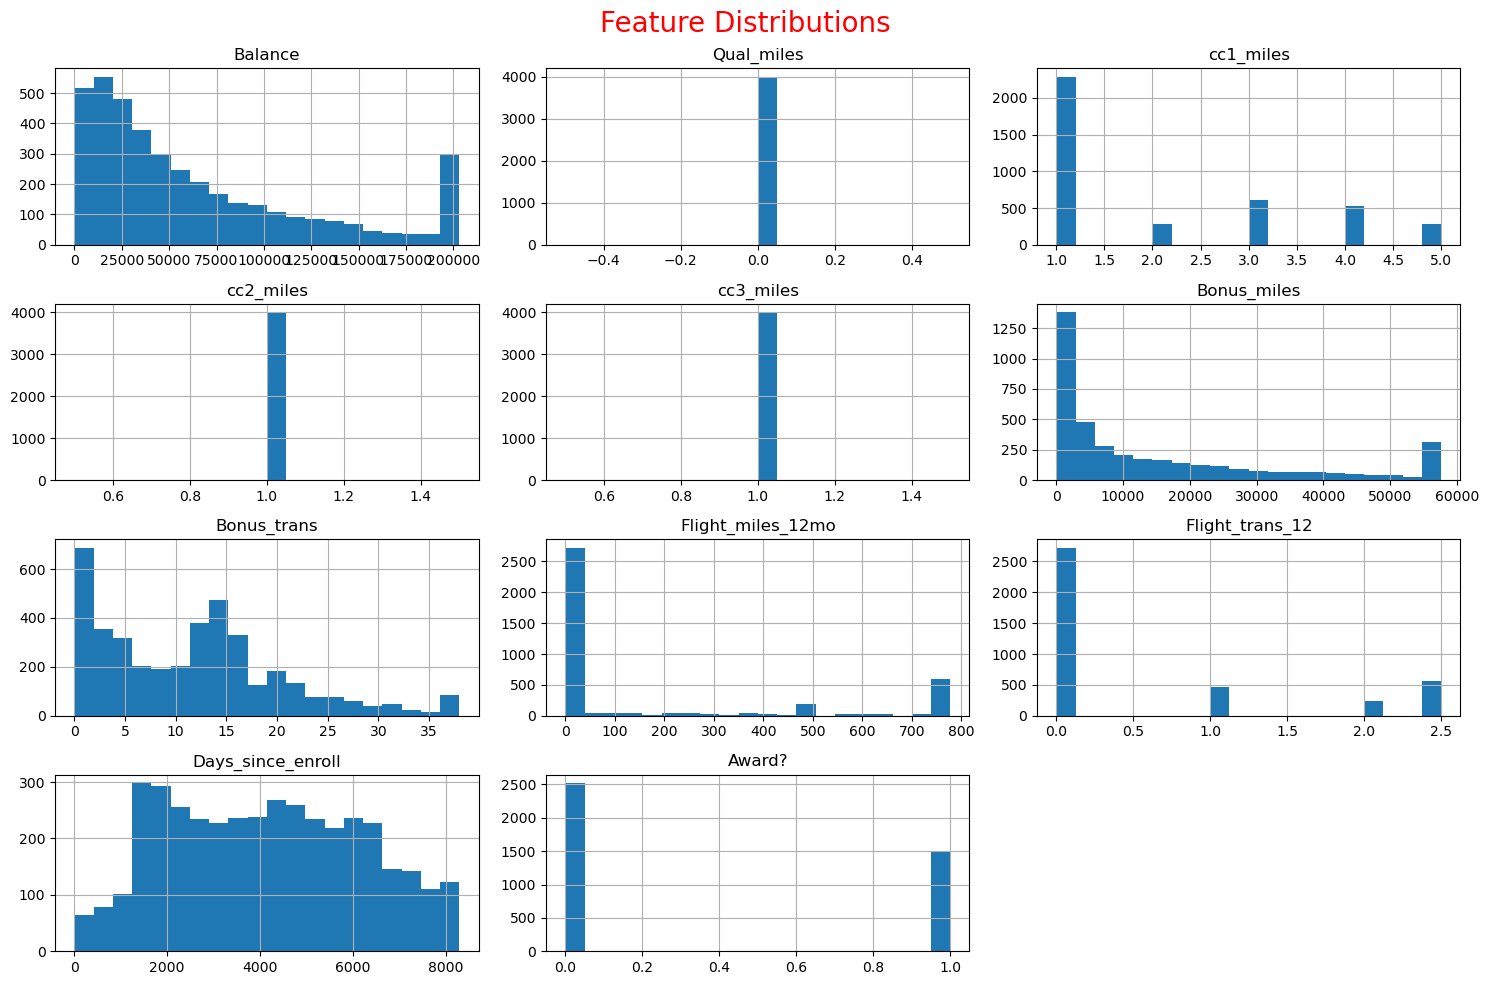

In [15]:
#Histogram
df.hist(figsize=(15,10),bins=20)
plt.suptitle('Feature Distributions',fontsize=20,color='red')
plt.tight_layout()
plt.show()

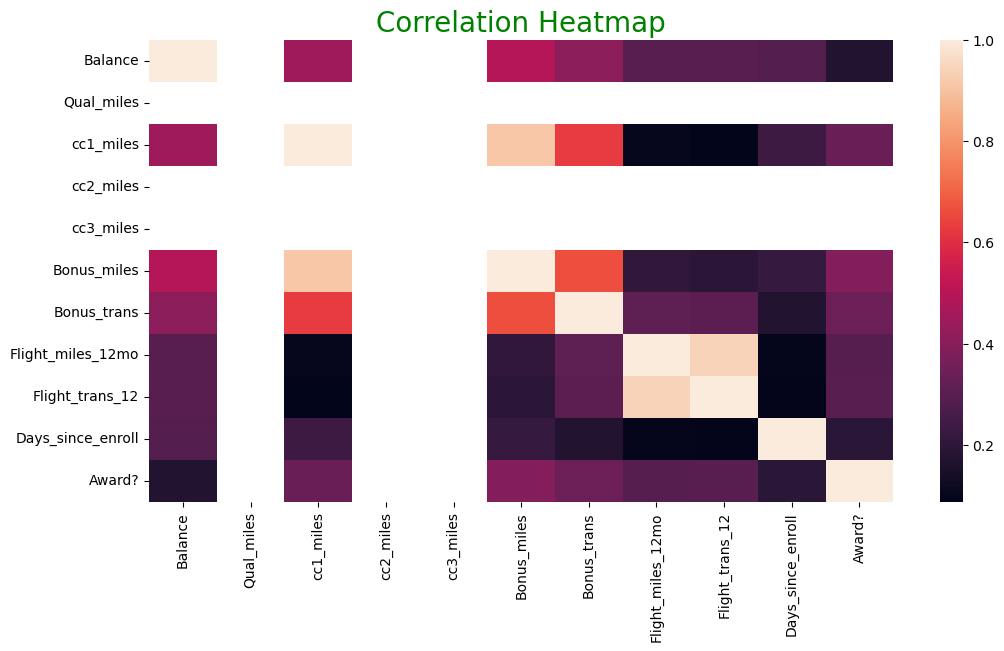

In [16]:
#Correlation Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=False)
plt.title('Correlation Heatmap',color='green',fontsize=20)
plt.show()

In [17]:
# Scaling
std_slr=StandardScaler()
scaled_df=pd.DataFrame(std_slr.fit_transform(df),columns=df.columns)
scaled_df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.607258,0.0,-0.769578,0.0,0.0,-0.843091,-1.148854,-0.604313,-0.626143,1.395454,-0.766919
1,-0.758947,0.0,-0.769578,0.0,0.0,-0.840822,-1.039133,-0.604313,-0.626143,1.379957,-0.766919
2,-0.382070,0.0,-0.769578,0.0,0.0,-0.624581,-0.819689,-0.604313,-0.626143,1.411920,-0.766919
3,-0.835106,0.0,-0.769578,0.0,0.0,-0.825052,-1.148854,-0.604313,-0.626143,1.372208,-0.766919
4,0.579265,0.0,1.409471,0.0,0.0,1.543191,1.594189,2.034489,2.020176,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.772038,0.0,-0.769578,0.0,0.0,-0.381007,-0.819689,0.074478,0.432384,-1.315120,1.303918
3995,0.010506,0.0,-0.769578,0.0,0.0,-0.798437,-0.709967,-0.604313,-0.626143,-1.318994,1.303918
3996,0.167530,0.0,0.683121,0.0,0.0,0.555335,-0.380802,-0.604313,-0.626143,-1.315604,1.303918
3997,-0.151188,0.0,-0.769578,0.0,0.0,-0.825052,-1.148854,1.092666,0.432384,-1.316088,-0.766919


# **2)Implementing Clustering Algorithms:**

# **1:K-Means Clustering**

In [18]:
inertia=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    clusters=kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)
print(inertia)

  File "C:\Users\S Tharun Kumar\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\S Tharun Kumar\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\S Tharun Kumar\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\S Th

[31992.000000000004, 22258.77428380222, 17645.544659962223, 16023.713171190968, 14712.227658337639, 12408.159636881015, 11413.770119749386, 10732.679418889857, 10172.667158140463, 9597.98375990891]


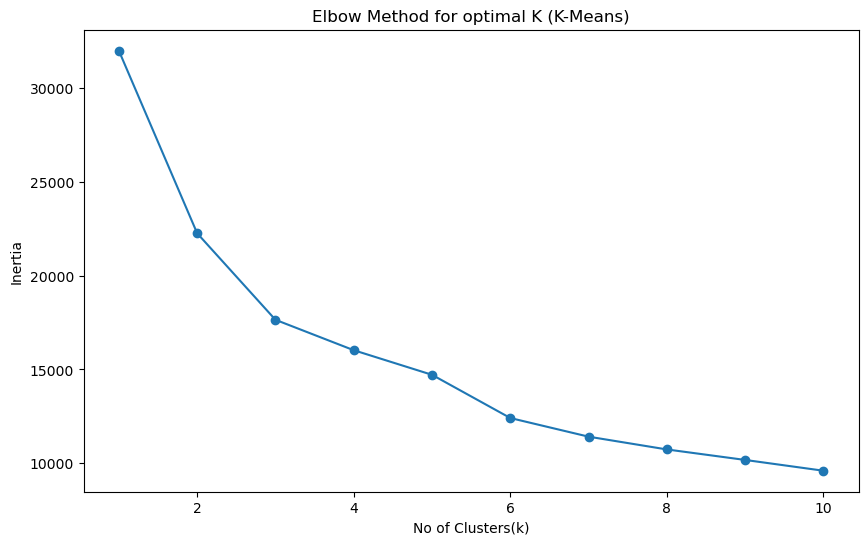

In [19]:
# Elbow method to fing optimal k value
plt.figure(figsize=(10,6))
plt.plot(range(1,11),inertia,'o-')
plt.xlabel('No of Clusters(k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for optimal K (K-Means)')
plt.show()

In [20]:
kmeans=KMeans(n_clusters=3,random_state=100)
pred=kmeans.fit_predict(scaled_df)

In [21]:
print('K-Means Silhouette Score:',(silhouette_score(scaled_df,pred)))
kmeans_cluster_means=pd.DataFrame(std_slr.inverse_transform(kmeans.cluster_centers_),columns=df.columns)
print('\nK-Means Cluster Centers:\n',kmeans_cluster_means)

K-Means Silhouette Score: 0.3309873833540122

K-Means Cluster Centers:
          Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles   Bonus_miles  \
0  105828.908602         0.0   3.992180        1.0        1.0  40045.669110   
1   37974.512954         0.0   1.329052        1.0        1.0   5185.971324   
2   84960.098538         0.0   1.603064        1.0        1.0  12466.391713   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0    19.590420         175.028837         0.581623        5001.112414   
1     7.176262          20.763950         0.090345        3682.120461   
2    13.406685         677.026462         2.181755        4233.639276   

     Award?  
0  0.648094  
1  0.180691  
2  0.571031  


In [22]:
# PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
reduced=pca.fit_transform(scaled_df)

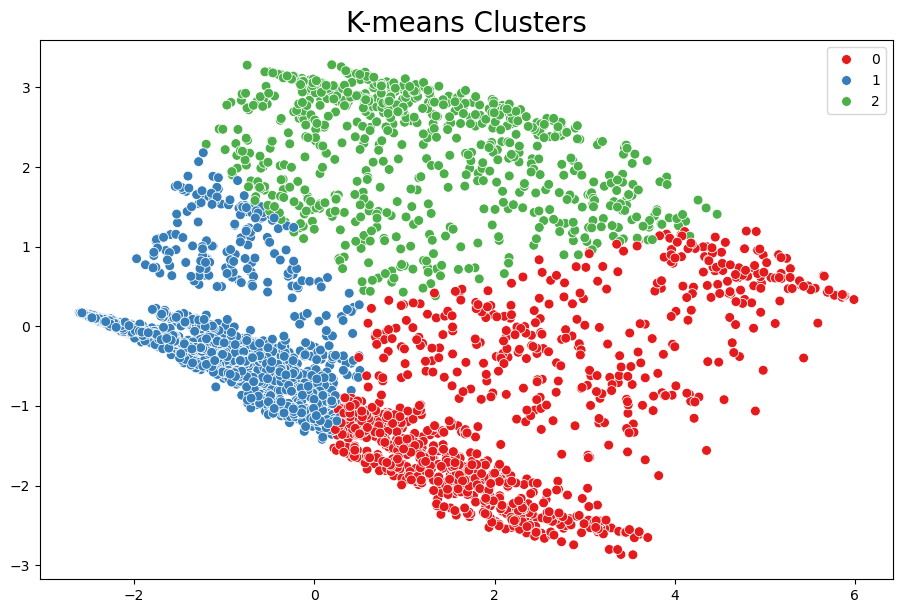

In [23]:
plt.figure(figsize=(11,7))
sns.scatterplot(x=reduced[:,0],y=reduced[:,1],hue=pred,palette='Set1',s=50)
plt.title('K-means Clusters',fontsize=20)
plt.show()

# K-Means Clustering – Insights
- The Elbow Method indicated an optimal number of clusters at k = 3, suggesting a clear grouping structure in the dataset.
- The Silhouette Score of 0.3309 indicates reasonably compact and moderately well-separated clusters.
- The cluster centroids (after inverse scaling) reveal distinct customer patterns:
  - One cluster is characterized by **very high Balance, Bonus_miles, and Bonus transactions**, representing premium and highly loyal customers.
  - Another cluster shows **low balances, low bonus miles, and minimal flight activity**, representing a low-value or less engaged customer segment.
  - A third cluster has high Flight_miles_12mo with **moderate balance and bonus miles**, indicating active flyers who are not necessarily premium spenders.

**Interpretation:** K-Means effectively segments customers into meaningful groups such as premium, low-value, and active mid-tier customers, making it suitable for customer profiling and targeted marketing strategies.

# **2:Hierarchical Clustering**

In [24]:
from sklearn.cluster import AgglomerativeClustering

In [25]:
optimal_k=3

In [26]:
linkages = ['ward', 'complete', 'average', 'single']
for link in linkages:
    try:
        agg = AgglomerativeClustering(n_clusters=optimal_k, linkage=link, metric='euclidean')
    except TypeError:
        agg = AgglomerativeClustering(n_clusters=optimal_k, linkage=link, affinity='euclidean')

    agg_labels = agg.fit_predict(scaled_df)
    score = silhouette_score(scaled_df,agg_labels)
    print(f"Hierarchical ({link}) Silhouette Score:", score)

Hierarchical (ward) Silhouette Score: 0.25553610801899945
Hierarchical (complete) Silhouette Score: 0.29421207530901033
Hierarchical (average) Silhouette Score: 0.3085807164934985
Hierarchical (single) Silhouette Score: 0.21420688840410834


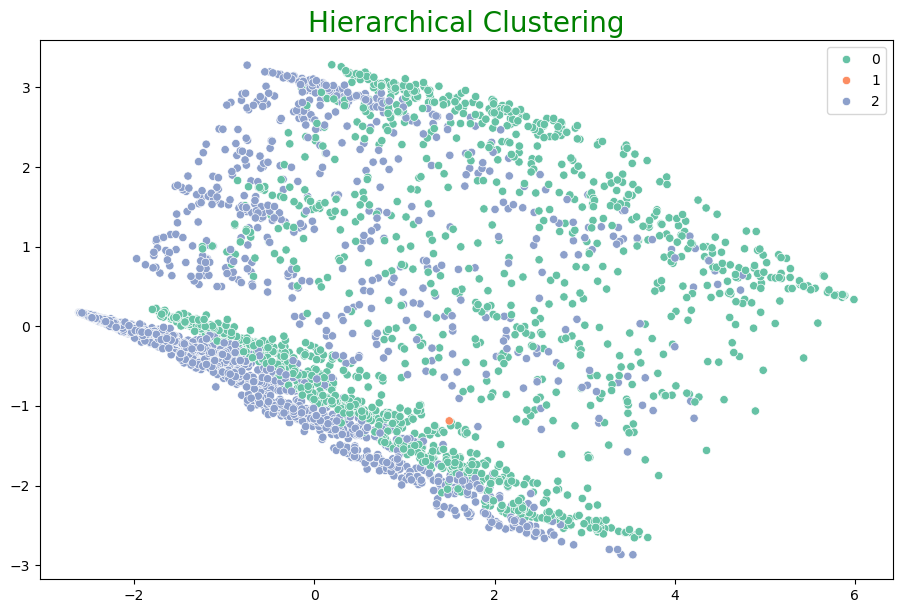

In [27]:
plt.figure(figsize=(11,7))
sns.scatterplot(x=reduced[:,0],y=reduced[:,1],hue=agg_labels,palette='Set2')
plt.title('Hierarchical Clustering',fontsize=20,color='Green')
plt.show()

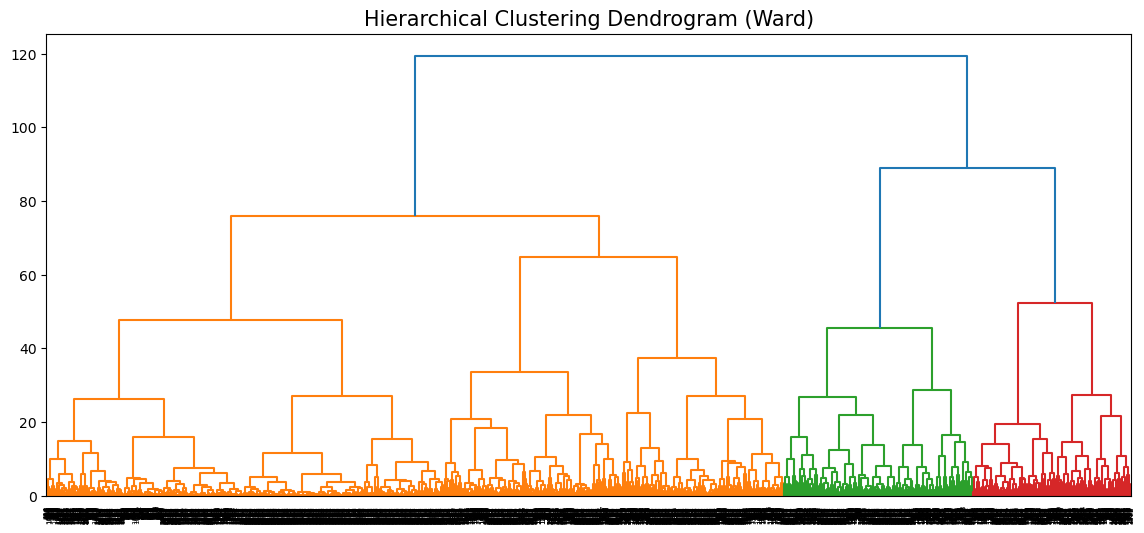

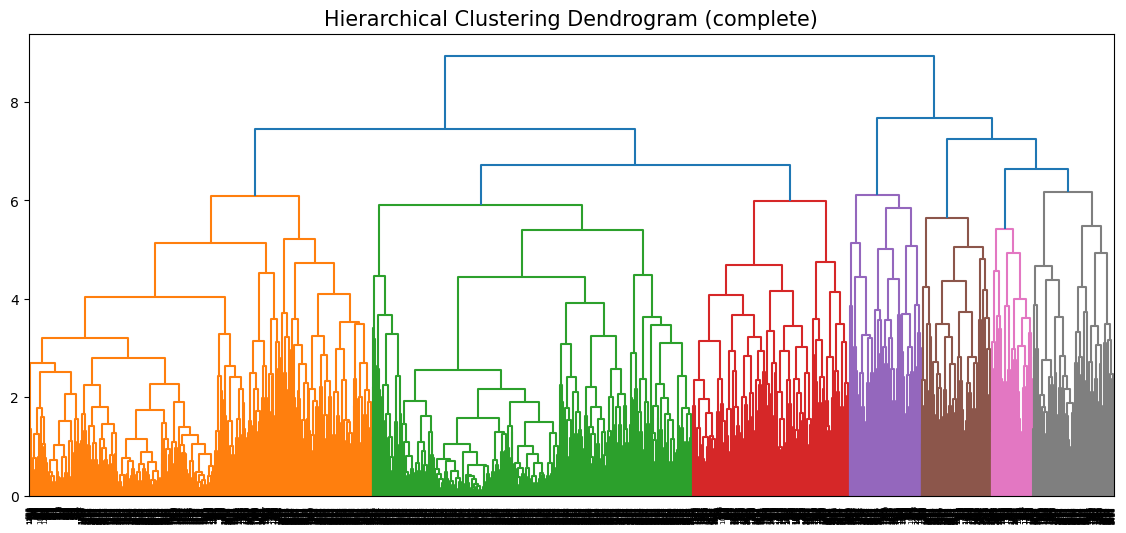

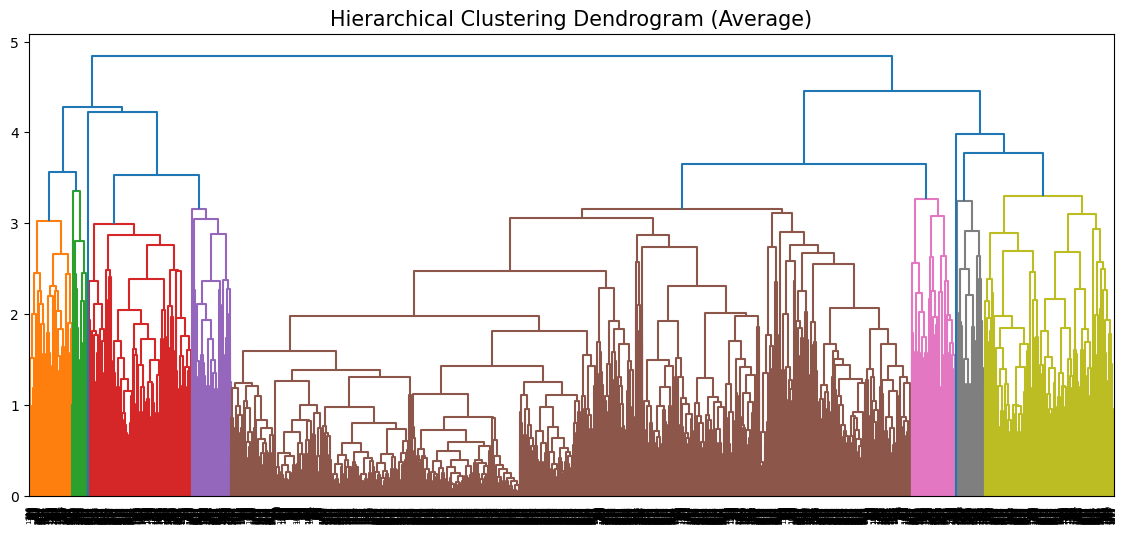

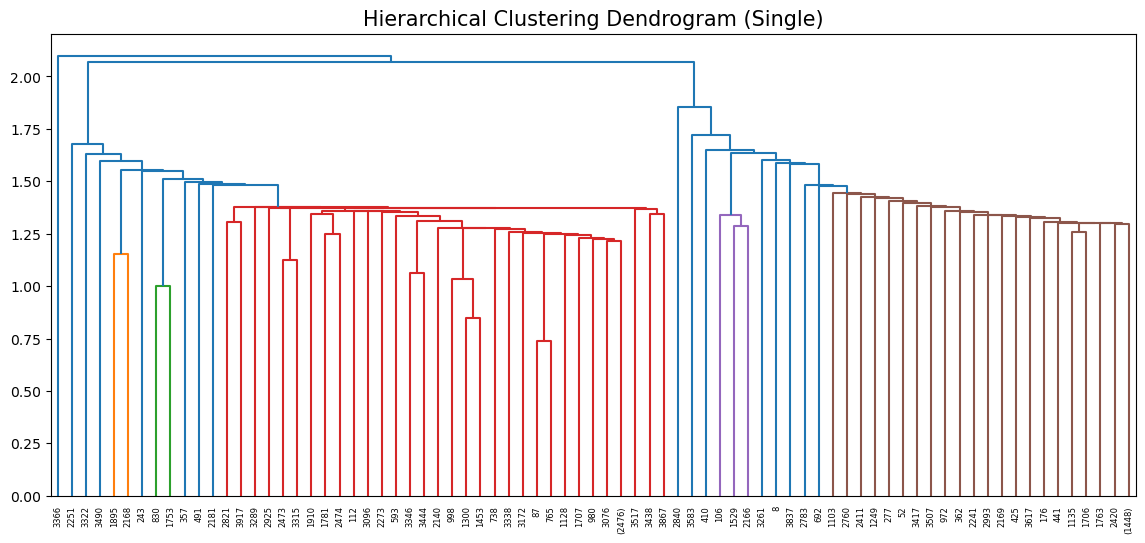

In [28]:
# Dendrogram with Ward linkage
from scipy.cluster.hierarchy import dendrogram,linkage 

linked = linkage(scaled_df, method='ward')
plt.figure(figsize=(14,6))
dendrogram(linked, truncate_mode='level')
plt.title('Hierarchical Clustering Dendrogram (Ward)',fontsize=15)
plt.show()

linked_complete=linkage(scaled_df,method='complete')
plt.figure(figsize=(14,6))
dendrogram(linked_complete,truncate_mode='level')
plt.title('Hierarchical Clustering Dendrogram (complete)',fontsize=15)
plt.show()

plt.figure(figsize=(14,6))
linked_avg=linkage(scaled_df,method='average')
dendrogram(linked_avg,truncate_mode='level')
plt.title('Hierarchical Clustering Dendrogram (Average)',fontsize=15)
plt.show()

plt.figure(figsize=(14,6))
linked_single=linkage(scaled_df,method='single')
dendrogram(linked_single,truncate_mode='level')
plt.title('Hierarchical Clustering Dendrogram (Single)',fontsize=15)
plt.show()

# Hierarchical Clustering – Insights
- Hierarchical clustering revealed a clear cluster structure, as observed from the **dendrogram**.
- Different linkage methods were tested, and the **Average linkage method achieved the highest Silhouette Score (0.3085)** compared to **Ward, Complete, and Single linkage methods**.
- The clusters formed show noticeable variation in customer behavior and feature distribution, confirming the presence of heterogeneous customer groups.
- However, the Silhouette Scores are slightly **lower than K-Means**, indicating comparatively weaker separation.

**Interpretation:** Hierarchical clustering provides an interpretable view of customer segmentation and confirms the presence of structured groups, but K-Means performs slightly better in terms of cluster compactness and separation.

# **3:DBSCAN Clustering**

In [29]:
eps=[0.1,0.2,0.3,0.4,0.5,0.6,0.7]
min_samples=range(1,11)

In [30]:
output=[]
for i in eps:
    for j in min_samples:
        labels=DBSCAN(eps=i,min_samples=j).fit_predict(scaled_df)
        unique_labels = set(labels) - {-1}
        if len(unique_labels) >= 2:
            score = silhouette_score(
                scaled_df[labels != -1],
                labels[labels != -1]
            )
            output.append([i, j, score])
        else:
            output.append([i, j, -1])
print(output)

[[0.1, 1, np.float64(-0.01728511173545889)], [0.1, 2, np.float64(0.04193043770190468)], [0.1, 3, np.float64(-0.05768041655903477)], [0.1, 4, np.float64(-0.07928020466459944)], [0.1, 5, np.float64(0.03748386414390541)], [0.1, 6, np.float64(0.2371049966188122)], [0.1, 7, np.float64(0.37565355458021793)], [0.1, 8, np.float64(0.508821793985027)], [0.1, 9, np.float64(0.5120203520872335)], [0.1, 10, np.float64(0.6132319940000077)], [0.2, 1, np.float64(-0.09077885627816165)], [0.2, 2, np.float64(-0.13165531665311317)], [0.2, 3, np.float64(-0.25298552943918473)], [0.2, 4, np.float64(-0.11364382616955084)], [0.2, 5, np.float64(-0.15697802208143224)], [0.2, 6, np.float64(-0.2215450064940364)], [0.2, 7, np.float64(-0.24735354238400695)], [0.2, 8, np.float64(-0.2565759049171682)], [0.2, 9, np.float64(-0.2570248047694582)], [0.2, 10, np.float64(-0.1356688786641822)], [0.3, 1, np.float64(-0.082206707931552)], [0.3, 2, np.float64(-0.019768365311531304)], [0.3, 3, np.float64(-0.11153522557590456)], [0

In [31]:
table=pd.DataFrame(output,columns=['eps','min_samples','score'])
table

,eps,min_samples,score
0,0.1,1,-0.017285
1,0.1,2,0.041930
2,0.1,3,-0.057680
3,0.1,4,-0.079280
4,0.1,5,0.037484
...,...,...,...
65,0.7,6,0.110620
66,0.7,7,0.124976
67,0.7,8,0.128427
68,0.7,9,0.165777


In [32]:
max_score=table['score'].max()
max_score

0.6132319940000077

In [33]:
print('This is the row which is having Highest Silhoutte Score:')
table[table.score==max_score]

This is the row which is having Highest Silhoutte Score:


,eps,min_samples,score
9,0.1,10,0.613232


In [34]:
best_labels=DBSCAN(eps=0.1,min_samples=10).fit_predict(scaled_df)
best_labels

array([-1, -1, -1, ..., -1, -1,  3])

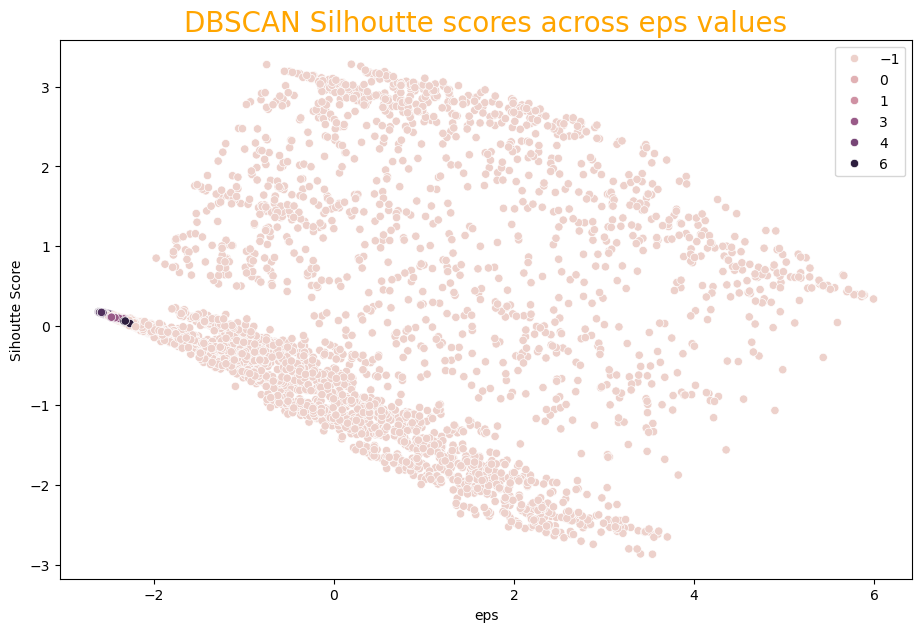

In [35]:
plt.figure(figsize=(11,7))
sns.scatterplot(x=reduced[:,0],y=reduced[0:,1],hue=best_labels)
plt.xlabel('eps')
plt.ylabel('Sihoutte Score')
plt.title('DBSCAN Silhoutte scores across eps values',fontsize=20,color='orange')
plt.show()

# DBSCAN – Insights
- DBSCAN was applied with multiple parameter combinations of **eps** and **min_samples.**
- For certain parameter values (eps = 0.1, min_samples = 10), **DBSCAN achieved a high Silhouette Score of 0.6132**, outperforming both **K-Means and Hierarchical clustering.**
- However, the algorithm is highly sensitive to parameter selection, and many parameter combinations resulted in poor clustering performance or excessive noise points.
- DBSCAN also identified some observations as noise (-1), indicating the presence of **outliers** in the dataset.

**Interpretation:** When properly tuned, DBSCAN performs exceptionally well for this dataset by identifying dense regions and isolating outliers. It provides the best clustering performance among the three methods.

# --------------------------------------THE END------------------------------------------